In [1]:
%pip install qiskit qiskit-aer matplotlib

Note: you may need to restart the kernel to use updated packages.



--- Generating Circuit Diagram ---
Displaying circuit diagram in cell output:


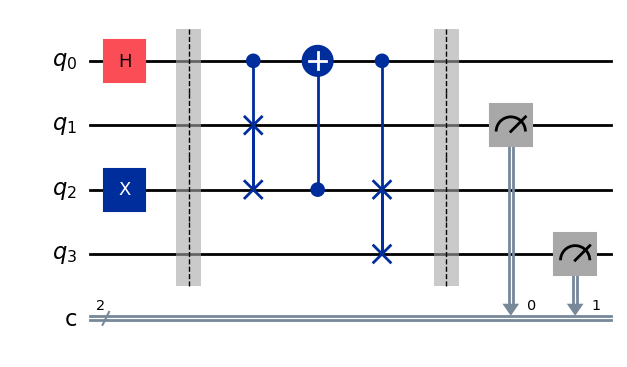

Circuit diagram also saved to: H:\Developement\QGSS25\WISER\quantum_peg_circuit.png

--- Simulation Results ---
{'10': 4114, '01': 4078}

--- Generating Histogram ---
Displaying histogram in cell output:


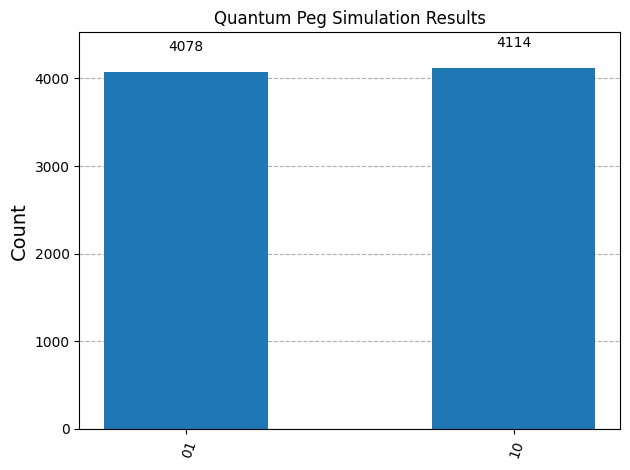

Histogram also saved to: H:\Developement\QGSS25\WISER\quantum_peg_histogram.png


In [11]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os 

try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_quantum_peg_circuit():
    """
    Generates a Qiskit QuantumCircuit for a single 'quantum peg' as
    described in the "Universal Statistical Simulator" paper (Fig. 3).

    The circuit uses 4 qubits, mapped as follows from the paper:
    - q0: The control qubit that determines the path (left/right).
    - q1: The 'left' output channel.
    - q2: The input channel where the 'ball' starts.
    - q3: The 'right' output channel.

    Returns:
        QuantumCircuit: A Qiskit circuit object representing one quantum peg.
    """
    qc = QuantumCircuit(4, 2, name="Quantum Peg")
    qc.x(2)
    qc.h(0)
    qc.barrier() 
    qc.cswap(0, 1, 2)
    qc.cx(2, 0)
    qc.cswap(0, 2, 3)
    qc.barrier()
    qc.measure([1, 3], [0, 1])

    return qc

if __name__ == '__main__':
    peg_circuit = create_quantum_peg_circuit()

    print("\n--- Generating Circuit Diagram ---")
    circuit_diagram = peg_circuit.draw("mpl")
    
    if IS_IPYTHON:
        print("Displaying circuit diagram in cell output:")
        display(circuit_diagram)
    
    circuit_filename = "quantum_peg_circuit.png"
    circuit_diagram.savefig(circuit_filename)
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    simulator = AerSimulator()
    compiled_circuit = transpile(peg_circuit, simulator)
    job = simulator.run(compiled_circuit, shots=8192)
    result = job.result()
    counts = result.get_counts(compiled_circuit)

    print("\n--- Simulation Results ---")
    print(counts)
    
    print("\n--- Generating Histogram ---")
    histogram_figure = plot_histogram(counts, title="Quantum Peg Simulation Results")
    
    if IS_IPYTHON:
        print("Displaying histogram in cell output:")
        display(histogram_figure) # This renders the plot in the notebook

    histogram_filename = "quantum_peg_histogram.png"
    histogram_figure.savefig(histogram_filename)
    print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")
    
    plt.close('all')


--- Generating Circuit Diagram ---


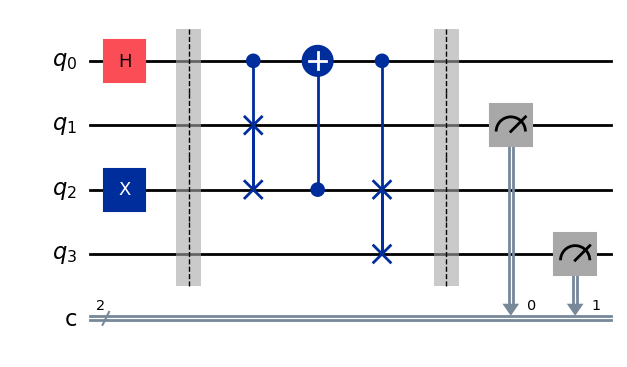

Circuit diagram also saved to: H:\Developement\QGSS25\WISER\quantum_peg_circuit.png

--- Running circuit with Sampler ---

--- Sampler Results (Probabilities) ---
{'10': 0.4996337890625, '01': 0.5003662109375}

--- Generating Histogram ---


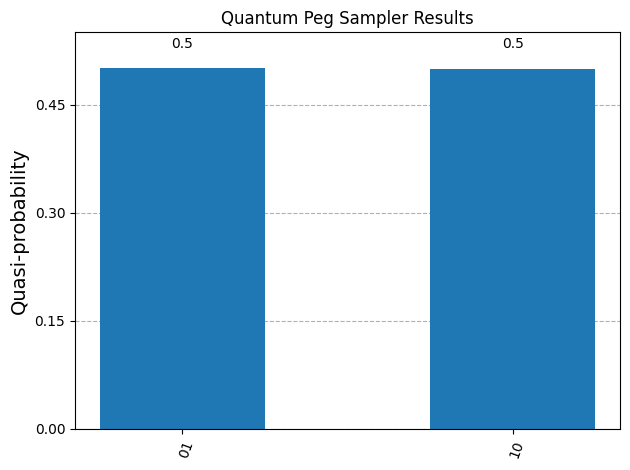

Histogram also saved to: H:\Developement\QGSS25\WISER\quantum_peg_histogram.png


In [20]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler 
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt 

try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_quantum_peg_circuit():
    qc = QuantumCircuit(4, 2, name="Quantum Peg")

    qc.x(2)
    qc.h(0)
    qc.barrier()
    qc.cswap(0, 1, 2)
    qc.cx(2, 0)
    qc.cswap(0, 2, 3)
    qc.barrier()
    qc.measure([1, 3], [0, 1])

    return qc

if __name__ == '__main__':
    peg_circuit = create_quantum_peg_circuit()

    print("\n--- Generating Circuit Diagram ---")
    circuit_diagram = peg_circuit.draw("mpl")
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = "quantum_peg_circuit.png"
    circuit_diagram.savefig(circuit_filename)
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(peg_circuit, shots=8192)
    result = job.result()
    
    quasi_dist = result.quasi_dists[0]
    probabilities = quasi_dist.binary_probabilities()

    print("\n--- Sampler Results (Probabilities) ---")
    print(probabilities)
    
    print("\n--- Generating Histogram ---")
    histogram_figure = plot_histogram(probabilities, title="Quantum Peg Sampler Results")
    if IS_IPYTHON:
        display(histogram_figure)
    histogram_filename = "quantum_peg_histogram.png"
    histogram_figure.savefig(histogram_filename)
    print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")
    
    plt.close('all')